In [1]:
import utils.data as data
import utils.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def tmp():
    df = data.load_data("ugr16", "raw.csv", verbose=False)
    total_duration = df["time"].max()

    dfg = df.groupby(stats.five_tuple)
    flowsizes = dfg.size()
    print(flowsizes.max())



tmp()
del tmp

Loading data from:
	data\ugr16\raw.csv
Number of packets: 1000000
Trace duration: 1342.636 seconds
73


Loading data from:
	data\caida\raw.csv
Number of packets: 998912
Trace duration: 2.3428690433502197 seconds
Time unit 2.3e-04 has 9990 bars
(9990,)
3600
(15349059,)
15339787/15349059, 99.9395923880415%
15339787/15349059, 99.9395923880415%
15339787/15349059, 99.9395923880415%
15339787/15349059, 99.9395923880415%
15339787/15349059, 99.9395923880415%


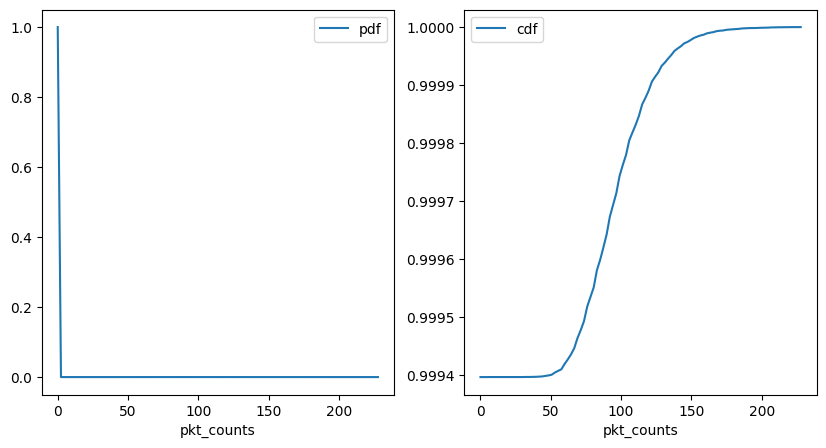

In [6]:
def tmp():
    df = data.load_data("caida", "raw.csv", verbose=False)
    total_duration = df["time"].max()
    # df = df[df["time"] < total_duration / 10]
    total_duration = df["time"].max()
    ts, pkt_counts = stats.pkt_count(
        df, time_unit_exp=np.log10(total_duration / len(df) * 100), total_duration=3600, all_unit=True)

    # plot pdf and cdf of pkt_counts
    pdf, bins = np.histogram(pkt_counts, bins=100, density=True)
    pdf = pdf / np.sum(pdf)
    cdf = np.cumsum(pdf)
    # print percentiles of 0 to 5
    for i in range(5):
        num = np.sum(pkt_counts <= i)
        print("{}/{}, {}%".format(
              num, len(pkt_counts), num / len(pkt_counts) * 100))
    

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].plot(bins[:-1], pdf, label="pdf")
    ax[1].plot(bins[:-1], cdf, label="cdf")
    ax[0].set_xlabel("pkt_counts")
    ax[1].set_xlabel("pkt_counts")

    ax[0].legend()
    ax[1].legend()

tmp()
del tmp
